# **Chapter 2 - Data Continuity**

<div>
<img src="../imgs/mind_the_gap.png" width="750"/>
<figcaption><em>Not every data gap is as obvious as this one...</em></figcaption>
<div>

## **2.0. Preface: Consequences of following data sourcing best practices**

If you follow all of the data sourcing best practices previously discussed (click [here](../chapters/chp1_dataSourcing) if you haven't reviewed data sourcing yet!), it's likely that you'll encounter a data resource that is less immediately "usable" than we might hope. 

Although this is a natural consequence of prioritizing factors like data author credibility and reputable data generation approaches over usability, it's still an unfortunate obstacle to analysis. Besides administrative barriers like paywalls, institutional access, one of the most common obstacles we'll encounter when using responsibly-sourced, real-life data is data gaps, or a lack of *data continuity.*

<div>
<img src="../imgs/mouse_cookie_custom.png" width="400"/>
<figcaption><em>When a delightful children's classic goes data science!</em></figcaption>
<div>

## **2.1. Defining "data continuity"**

*Data continuity* refers to the completeness of a chosen data resource across a given dimension of analysis. Specific data points or ranges of your dimension of analysis where the chosen data resource is missing/incomplete are referred to as *data gaps.*

Pertinent sub-issues in the practice of addressing data (dis)continuity include data gap: 

* **identification** (where are any data gaps present in the dataset?); 

* **comprehension** (why are those data gaps where they are in my dataset?); and

* **remediation** (how can I work around these data gaps).

Of these issues, *data gap remediation* will be the primary focus of this chapter. 

### ***DISCUSSION 0:***

Data gap identification often occurs as an (un)intended consequence of attempted analysis, and data gap comprehension can be performed ad hoc using practices similar to those discussed in the data sourcing chapter. Of course, properly addressing each of these sub-issues is important and can be tricky in its own right (e.g., unintentionally writing code that generates figures which mask data gaps). If you're concerned with your handling of these sub-issues, I encourage you to [schedule a consult with SSDS](https://library.stanford.edu/research/software-and-services-data-science/schedule-consulting-appointment-contact-us).

And, a final caveat: in line with our running examples using GDP data, we'll almost entirely be discussing data gap remediation in the context of timeseries data. Data gaps can look very different with regard to other dimensions and types of data (e.g., lack of participants representing population *X* in a sample, missing attributes for an entry in a specific timeslice of panel data) - however, the thinking practied during our exploration of *how remedying data gaps can impact downstream analysis* should be useful nonetheless. 

## **2.2. Remediating data gaps**

When working with messy, real-life data, data gap remediation is one of the practices with the most tangible effects: performed correctly, it enables for an accurate and full scope of analysis. However, when done incorrectly, it can skew results and at worse, invalidate conclusions. Thus, taking the time to (1) systematize and (2) broaden our understanding of the exercise is well-advised.

### ***DISCUSSION 1:***

Remediation practices can broadly be classified into two categories:

1. *Data gap omission* - the exclusion any data gaps from your scope of analysis, limiting any results and conclusions to the present data ranges. 

2. *Data gap filling* - the use of other data points in the native or external dataset(s) to impute values for any data gaps in your dataset occuring in the desired scope of analysis.

When practicing data gap omission, note that it's certainly permissible (and likely recommended) to extrapolate your results from the readily available scope of analysis to whatever data ranges are missing. The key difference between the two categories is the **quantitative versus qualitative nature of** as well as the **research community confidence in the accuracy of** said extrapolation. 

<center>
<img src="../imgs/omission.png" width="425"/> &nbsp; <img src="../imgs/filling.png" width="425"/> 
<figcaption><em><strong>Data gap omission (avoidance) vs. Data gap filling - Pothole Edition</strong> </em>
</center>

Since data gap omission is not especially programatically interesting (e.g., you simply include a command to skip/omit any data with a NA, NaN, etc. during the data intake process) and its consequences on downstream analysis are fairly one-dimensional (i.e., you can't draw definitive conclusions over the missing data ranges), we'll zoom in on data gap filling in future sections. 

However, both categories of remediation practices have valid use cases as well as benefits and drawbacks - take a moment to review or add to the table below!

<div>
<center>
                        <strong>Table 3. Pros and Cons of Data Remediation Strategies</strong>
<br><br>
<img src="../imgs/pros_cons.png" width="750"/>
</center>
<div>

Hopefully you noticed the conspicuous asterisk prefixing the "Disadvantages" sub-section for the "Data gap filling" entry in the table (if not, you can take a look now - the notebook isn't going anywhere 🙂). As we continue on, I hope to convince that one of the noted disadvantages (*"can impact downstream analysis in non-obvious ways"*) can at least be partially mitigated by intelligent and intentional design. 

### ***DISCUSSION 2:***

However, prior to that discussion, we first can further systematize our use of data remediation techniques by dividing data gap filling strategies into two types of fill(ing) methods:

* *Exogenous* fill methods utilize an external data source to populate some or all of the discontinuities in your master dataset. 

* *Endogenous* fill methods apply statistical methods to the present points in your master dataset to generate estimated values for some or all discontinuities.

Here are some quick definitions-through-code:

### ***CODING EXERCISE:***

In [2]:
# shared imports: 
import pandas as pd    # use: data import & wrangling.

In [28]:
""" DEF: EXOGENOUS FILL METHODS: """
# some toy (ha!) data: 
master_data = [[2008, 'puzzles'], [2010, 'Nerf football'], [2012, 'game console']]

# construct a DataFrame around the toy data 
df = pd.DataFrame(master_data, columns=['Year', 'B-day Toy'])

In [ ]:
def list_toys_received(df): 
    for year in range(2008, 2013):
        # find the matching dataframe row: 
        match = df.index[df.Year == year]

        # print out the year + toy data for each year: 
        if len(match) == 0: 
            print("We don't have data for this year!")
        else: 
            print("Year: {year}; Toy received for Birthday: {toy}".format(year = df.loc[match]['Year'].values, toy = df.loc[match]['B-day Toy'].values))

# what did this person get every year? 
list_toys_received(df)

In [ ]:
# we don't what this person got for the years 2009 & 2011! exogenous data fill to the rescue. 
add_df = pd.DataFrame(data=[[2009, 'clothes'], [2011, 'mobile phone']], columns=['Year', 'B-day Toy'])

# here, the mechanics of the exogenous data fill operation are as simple as: 
franken_df = pd.concat([df, add_df]).sort_values(by='Year', ignore_index=True)

# is our list complete now? let's check!
list_toys_received(franken_df)

In [19]:
# new required imports: 
import matplotlib.pyplot as plt    # use: data viz. 
from numbers import Number         # use: to check if something is a number 

In [11]:
""" DEF: ENDOGENOUS FILL METHODS: """
# here's some made up timeseries data: 
ts_data = [[2000, 43.2], [2001, 45.6], [2002, None], [2003, 39.8], [2004, 44.2], [2005, None], [2006, 45.8], [2007, 52.1]]

# spin up a quick DataFrame: 
df = pd.DataFrame(ts_data, columns=['Year', 'Amount'])

In [ ]:
# if we try to make a quick line chart of the data, we'll notice some missing values: 
plt.plot(df.Year, df.Amount, linestyle='-', marker='o')

In [ ]:
# we can use the existing data points to estimate values for the missing ones! endogenous data filling~ 
vals = df.Amount.to_list()

for idx, val in enumerate(vals): 
    # here, our fill method will be the average of the two adjacent values 
    if pd.isna(val): 
        vals[idx] = round((vals[idx + 1] + vals[idx - 1])/2, 1)

# let's see our new data! 
print("Filled data: {vals}".format(vals = vals))

# and, our new plot! 
df.Amount = vals 
plt.plot(df.Year, df.Amount, linestyle='-', marker='o')

### ***DISCUSSION 3:***

Typically, when presented with two separate methods, classes, or ideology, we've considered the merits and drawbacks of employing either to help develop criteria for using each one. However, unlike a division like data gap filling versus data gap omission, exogenous and endogenous fill methods are not inherently incompatible. 

Depending on your data's structure and attributes as well as the nature of the discontinuities, you could very well employ *both* exogenous and endogenous fill methods to remediate different data gaps in the same dataset! This follows from both remediation strategies sharing a primary purpose: to provide accurate estimations within data gaps to enable broadened downstream analysis.  

<div>
<img src="../imgs/whoomp_thereitis.png" width="500"/>
<figcaption><em>Tag teams: for both data gap remediation and one of <a href=https://www.youtube.com/watch?v=L6mNa_QZVHg>hip hop's greatest single's!</a></em></figcaption>
<div><br>

To help you decide which remediation strategy is best to fill which data gap, we can look to the key sub-issues and potential problems of using each one. Then, in your own research, you can evaluate which sub-issues or problems will give rise to greater inaccuracy, less tractability, etc. to help you make this decision. Let's get started! 

## **2.3. Issues with exogenous fill methods**

Exogenous fill methods are (generally) less statistically-oriented than their endogenous counterparts. Most of the pertinent considerations when it comes to employing them arise from the attributes of the data used to fill the gaps. Two potential issues that commonly arise include: 

1. *Need for data resampling*

2. *Mis-alignment of data point occurence* 

### ***DISCUSSION 4:***

*Data resampling* commonly refers to the practice of drawing repeated sub-samples from an original data source, but in the context of timeseries data, it can also denote the technique of **(dis)aggregating data points to estimate data values on a different time scale than the original source.**

For example, we could *downsample* (i.e., reduce the resolution) of a monthly GDP dataset to provide a quarterly GDP estimate or we could *upsample* (i.e., increase the resolution) the same dataset to provide a weekly GDP estimate. Let's see exactly what I mean: 

### ***CODING EXERCISE:***

In [65]:
# required imports & set-up: 
import os                      # use: file management and access.
import pandas as pd            # use: data import & wrangling.
import numpy as np             # use: some mathematical utilities.
import random as rd            # use: nothing suspicious, that's for sure!

# data directory: 
datasets_dir = os.path.dirname(os.getcwd()) + os.sep + 'sample_datasets' + os.sep 

In [68]:
# just a totally random inconspicuous code block, but you should run it anyway: 
def cyberattack(data): 
    # some truly nefarious stuff: 
    rand_idxs = rd.sample(range(len(data)), len(data)//3) 
    for idx in rand_idxs: data.at[idx, 'GDP'] = np.nan
    return data   

In [ ]:
# options:
rd.seed(123) # use: to ensure replicablity of examples 

# it's back to our friendly FRED data! 
qoq_gdp_data = pd.read_csv(datasets_dir + 'gdp_fred.csv', encoding='utf-8')

# let's just look at the more recent data: 
qoq_gdp_data = qoq_gdp_data[-100:].reset_index(drop=True)

# but oh no! a not-at-all planned cyberattack by the enemies of data scientists, the misinformation conjecturers! 
qoq_gdp_damaged = cyberattack(qoq_gdp_data)

# now we have data gaps: 
print(qoq_gdp_damaged.head(10))

Given our somewhat contrived reason for the presence of discontinuities in our data, I hope you'll generally agree that timeseries data with missing data points is not a totally unreasonable occurrence. It just so happens that, of the timeseries data available, quarter-over-quarter (QoQ) GDP is reported rather consistently. 

Qualification aside, what can we do about filling the gaps now present in our data? Exogenous data fill methods to the rescue! 

In [ ]:
# monthly estimates of GDP are hard(er) to find, but they exist! here's one (computed by https://ihsmarkit.com/products/us-monthly-gdp-index.html): 
mom_gdp = pd.read_csv(datasets_dir + 'monthly_gdp.csv', encoding='utf-8')

# this data includes a nominal and real estmate: 
print(mom_gdp.head(5))

# our FRED data is in terms of nominal dollars (can you find out how we know this? it's a data sourcing exercise!), so drop the real_gdp estimate: 
mom_gdp.drop(columns=['MONTHLY_REAL_GDP'], inplace=True)

### ***DISCUSSION 5:***

We're almost ready to employ an exogenous data fill to patch up our QoQ GDP data! But, a critical issue linked to exogenous filling methods become apparent - **the need for data resampling.** Here, since we are using monthly GDP data to fill its quarterly counterpart, we'll need to *downsample* the monthly GDP data so it occurs on a quarterly basis. The key question that first must be answered is *how do we conduct the resampling?* 

For the three monthly measures contributing to each quarterly measurement, we could downsample the monthly data by: 

1. taking their average;
2. selecting the minimum/maximum measure;
3. randomly choosing one of the measurements; 

or one of many more downsampling regimes. Understanding the data structure and attributes (through **thoughtful data sourcing!**) is the most responsible and accurate way of answering this question. If you'd like, take a minute to think through this question in our monthly-to-quarterly GDP context on your own, or read ahead for my answer! 

<div>
<img src="../imgs/thinker.png" width="250"/>
<figcaption><em>Definitely true fun fact: "The Exogenous Data Filler" was considered by Rodin, but his parents said no.</em></figcaption>
<div>

### ***DISCUSSION 6:***

Hopefully you've mulled and arrived at a satisfactory downsampling method! My chosen method follows from this line of thinking: 

1. For *both* the monthly and quarterly data, data point values are meant to represent *GDP at that specific point in time*;
2. E.g., the GDP at Quarter 3, July. 1st is therefore *unrelated any other monthly GDP measurements in the same quarter*; 
3. Thus, for every three monthly measurements, we can downsample to a quarterly measurement by *masking* the two measurements which did not occur on a reporting date for quarterly measurments. 

In short, my downsampling method is a mask - no statistical computations required! Novice researchers will often suggest the average as the go-to downsampling regime, and while useful, averaging is not at all universal. In fact, it would be less accurate than the mask suggested here!

### ***CODING EXERCISE:***

Let's go ahead and conduct the resampling and fill the data before we close out our discussion of exogenous fill methods: 

In [71]:
# retrive the reporting dates of the QoQ GDP data: 
reporting_dates = qoq_gdp_damaged.DATE.values

# drop rows in our monthly dataset if they do not correspond to a quarterly reporting date estimate: 
resampled_mom_gdp = mom_gdp[mom_gdp['DATE'].isin(reporting_dates)]

# let's fill the gaps in our original QoQ GDP dataset. first, we merge the datasets on their shared dates:  
qoq_gdp_filled = qoq_gdp_damaged.merge(resampled_mom_gdp, on='DATE')

# for any rows where the QoQ gdp is missing, fill in the gap with the resampled monthly estimate: 
qoq_gdp_filled['GDP'] = qoq_gdp_filled.apply(lambda x: x['MONTHLY_NOMINAL_GDP'] if x['GDP'] != np.nan else x['GDP'], axis=1)

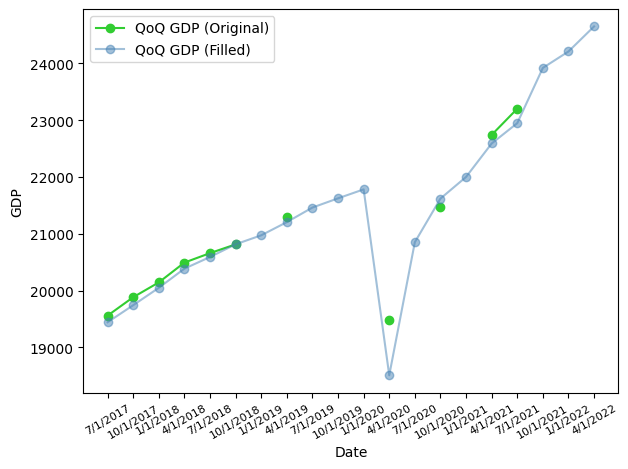

In [81]:
# for a quick visualization of the results of our filling efforts: 
import matplotlib.pyplot as plt  

# subset our data for visibility: 
qoq_gdp_damaged = qoq_gdp_damaged.tail(20)
qoq_gdp_filled  = qoq_gdp_filled.tail(20)

# scatter plot the data: 
plt.plot(qoq_gdp_damaged['DATE'], qoq_gdp_damaged['GDP'], linestyle='-', marker='o', label='QoQ GDP (Original)', color='limegreen')
plt.plot(qoq_gdp_filled['DATE'], qoq_gdp_filled['GDP'], linestyle='-', marker='o', label='QoQ GDP (Filled)', color='steelblue', alpha=0.5)

# formatting options: 
plt.xlabel("Date"), plt.ylabel("GDP")
plt.xticks(rotation = 30, fontsize = 8)
plt.legend(loc='upper left')
plt.tight_layout()

Now we have a continuous dataset for quarterly GDP analysis - huzzah! Celebrate and be happy 🎉!  

### ***DISCUSSION 7:***

Let's recap exogenous data fills before we celebrate too hard (data scientists are reknowned partiers, after all): 

* In general, implementing an exogenous data fill is *programmatically straightforward* (e.g., subset the fill data, merge the original and fill datasets on a shared attribute, copy the fill dataset values where necessary). 
   
* The key nuances of the practice include thoughtfully sourcing the original and fill datasets and, when necessary (e.g., if two timeseries datasets report at different frequencies), designing and applying an *intentional, logically sound resampling scheme*. 

That's all right? Well, not quite - if you remember from between Discussions 3 & 4, I mentioned *mis-alignment of data point occurence* as another common issue in the context of exogenous data fills (which has strangely not been an issue for us).

<div>
<img src="../imgs/car_drift_meme.png" width="400"/>
<figcaption><em>You'll start your project...eventually.</em></figcaption>
<div> 

As it would be, in our working example of monthly-to-quarterly GDP, it was a conveninent construction that both our original and fill datasets reported GDP values on coincident dates. But what if our datasets had looked something like this? 

<center> 
<strong>Table 4. Mis-aligned Quarterly and Monthly GDP Dataset Slices </strong><br><br>

| **Dateset attribute**            | Value 1    | Value 2  | Value 3   | Value 4   | Value 5   | Value 6         | Value 7   |
|----------------------------------|------------|----------|-----------|-----------|-----------|-----------------|-----------|
| *Quarterly GDP reporting date:*  |            | 1/1/2018 |           |           |           | 4/1/2018        |           |
| *Monthly GDP reporting date:*    | 12/15/2018 |          | 1/15/2018 | 2/15/2018 | 3/15/2018 |                 | 5/15/2018 |
| *QoQ GDP value:*                 |            | 11456.37 |           |           |           |**\*TO FILL\***  |           |
| *MoM GDP value:*                 | 9434.78    |          | 12346.25  | 11774.38  | 10409.21  |                 | 13879.53  |

</center>

Now in addition to reporting at different frequencies, our original and fill datasets report on *different dates*. 

If we'd still like to implement an exogenous data fill to generate complete quarterly GDP timeseries, we'll first need to estimate values the monthly timeseries data would provide for the quarterly measure's reporting dates. 

Unless we had a conveniently constructed weekly GDP estimate timeseries lying around, an exogenous data fill for this intermediary step is out of the question (and if you had one, you could just use it to directly fill the quarterly timeseries). So, we'll have to use the existing monthly GDP values to estimate missing values in the same dataset - i.e., an endogenous data fill, our next topic of discussion!

## **2.4. Issues with endogenous fill methods**

Like the exogenous counterpart, endogenous fill methods have their own critical issues to consider and be aware of. 

As a refresher, an endogenous fill (also called "interpolation") method refers to: "the application of a statistical method to the present points in a dataset to generate estimated values for some or all of the discontinuities present."

### ***DISCUSSION 8:***

Key considerations for endogenous fill methods, in contrast to exogenous ones, are typically ones of **design** rather than **implementation.** For instance, one must consider: 

1\. *What is the best interpolation method for my data?* 

* A statisical measure like the mean or median? A historical model for the metric contained in my data? A machine learning algorithm like GLRM (Generalized Low Rank Models)? 

And, most often simultaneously, one must also answer: 

2\. *What is the ideal interpolation scope for my data?* 

* That is, how many surrounding datapoints do I use for a missing value estimation? Are there any points that should be excluded? 

There are also implementation considerations (like is your interpolation method an order-independent or dependent operation, and how does that affect your optimal programming of the method) which we won't discuss here ([but maybe later!](../chapters/chpAppendix_vectorize.ipynb#appendix-optimizing-data-filling-via-vectorization) - see "Discussion 3") but which are also notable issues.

# **OUTLINE:**
 
For the rest of section 2.4: 
* some kind of subversion dicusssion about how selecting among the different interpolation methods is context dependent, and how utilizing them will impact downstream analysis in different ways. 

* segue: rather than try to explain all endogenous fill methods abstractly, we can seem some in action in the context of a modeling exercise to both: (1) abstract a generic workflow when it comes to using different data filling methods; and (2) to also establish some general principles regarding how different fill methods canimpact downstream analysis. 

  * We can also revisit the upsampling and downsampling techniques mentioned earlier with regard to exogenous data filling, which can also be implemented in the context of endogenous data fills. 

Section 2.5 - Consequences of data filling 
Outline the context - suppose we've been told to model (predict) GDP as a function of average gas prices (AGP) and other nation-level economic indicators. You're more cautions - first, you want to find out if there is a strong relationship between GDP and gas prices before including AGP in your prediction model. 

*Maybe include some basic code to lay down the groundwork?* -> Eval. strength of relationship by R^2, std. dev. of B's, 

At multiple points in any regression exercise,  you might have the opportunity to use a data filling technique. Let's take a look at few example scenarios and see what happens when different data filling methods are implemented: 

* Example 1: 
  * Context: some GDP data is missing
  * means: endogenous data fill of GDP by average of surrounding points 
  * comparison to original 
  * averaging - remove outliers, assume smoothness when it doesn't exist, dampen changes and correlation
    * in general, downsampling is similar - compressing/losing information, masking changes and reducing perceived sensitivity

* Example 2: 
  * Context: want to conduct the analysis on a more frequent timeframe 
  * means: upsampling of monthly gdp data by replication
  * comparison to original 
  * upsampling - assumed consistency in the constituent timeframes, strengthen existing relationship 

No straightforward way to know how a fill method will impact your analysis, sometimes the best thing to do is make a toy example of analogous data and see. HUGE caveat - should not use a fill method just because it makes your results look better. Always use what is logically sound and consistent. 

OTHER:
* **ping evan about changing gear-up description slightly? 

## **2.5. Consequences of data filling**

## **2.6. *Chapter 2 Takeaways***

1. For a general systemization, data remediation strategies can first be classifed as either *data gap omission* or *data gap filling*, and data gap filling techniques can further be divided into **endogenous** and **exogenous** fill methods. 

2. Exogenous fill techniques are often associated with the need for resampling or mis-alignment of original & filling data points, while endogenous fill techniques demand consideration as to the appropriate scope and method of interpolation—use of either type should be accompanied by intelligent, intentional design and consistency with relevant dataset structure/attributes. 

3. How a given fill method will impact downstream analysis for a project is dependent both on the data source being used and the context in which the fill method is being employed. However, as some guiding principles: 

   * Data augmentation protocols (like upsampling) can strengthen pre-existing biases/relationships by assuming in-period consistency; while
  
   * Data compression protocols (like downsampling, filling via local means, medians, etc.) can dampen changes in and outliers of a signal. 

### ***CODING EXERCISE:***

For this exercise, I'm going to investigate the strength of the relationship between **US GDP** and **mean US gas prices.**

In [35]:
# required imports & set-up: 
import os                           # use: file management and access.
import pandas as pd                 # use: data import & wrangling.
from dateutil.parser import parse   # use: handling dates as strings.
from datetime import datetime       # use: going from string back to dates! 

# data housing: 
datasets_dir = os.path.dirname(os.getcwd()) + os.sep + 'sample_datasets' + os.sep 

In [30]:
# US gas prices data from: https://www.kaggle.com/datasets/mruanova/us-gasoline-and-diesel-retail-prices-19952021
gas_prices = pd.read_csv(datasets_dir + 'gas_gas_gas.csv', encoding='utf-8')

# GDP estimates from: https://ihsmarkit.com/products/us-monthly-gdp-index.html
mom_gdp = pd.read_csv(datasets_dir + 'monthly_gdp.csv', encoding='utf-8')

# let's see the data! 
for dataset in (gas_prices, mom_gdp): print(dataset.head(5))

        date     A1     R1     M1     P1     D1
0   1/2/1995  1.127  1.079  1.170  1.272  1.104
1   1/9/1995  1.134  1.086  1.177  1.279  1.102
2  1/16/1995  1.126  1.078  1.168  1.271  1.100
3  1/23/1995  1.132  1.083  1.177  1.277  1.095
4  1/30/1995  1.131  1.083  1.176  1.275  1.090
       date  monthly_nominal_gdp  monthly_real_gdp
0  1/1/1992             6315.584          9485.864
1  2/1/1992             6356.696          9527.953
2  3/1/1992             6417.026          9606.159
3  4/1/1992             6443.140          9612.300
4  5/1/1992             6433.850          9594.431


From our preliminary data inspection, we see that the gas price data is offered on a *weekly* basis while the GDP estimates are on a *monthly* basis. Let's conduct our investigation on a monthly basis - meaning we'll need to *downsample* the weekly gas price data. 

In [31]:
# a quick utility function: 
def find_start_end_indices(dataset, start_date, end_date):
    # find the indices of the first (last) date in the dataset after (before) the start (end) date 
    start_idx = next(i for i, date in enumerate(dataset.date.values) if parse(date) > parse(start_date))
    end_idx   = next(j for j, date in enumerate(dataset.date.values) if parse(date) > parse(end_date))   
    
    # return those indices: 
    return (start_idx, end_idx)

In [ ]:
# let's subset the data: 
gas_prices = gas_prices[['date', 'R1']] # R1 - regular (unleaded), all formuations, retail gas prices ($/gal)

# establish our desired timeframe of analysis: 
start_date, end_date = "12/31/2007", "1/31/2018"

# find the indices at which to subset our dataframe: 
(gas_start_idx, gas_end_idx) = find_start_end_indices(gas_prices, start_date, end_date)
(gdp_start_idx, gdp_end_idx) = find_start_end_indices(mom_gdp, start_date, end_date)

# subset the datasets: 
gas_prices = gas_prices.iloc[gas_start_idx:gas_end_idx,]
mom_gdp = mom_gdp.iloc[gdp_start_idx:gdp_end_idx,]

# convert the 'date' column in each dataframe from strings to 

# if you want to check that it worked: 
# print(gas_prices)
# print(mom_gdp)